In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style(style='white')
from scipy import stats
import matplotlib.pylab as plt
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [2]:
df = pd.read_csv("shopping_behavior_updated.csv")

In [3]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df['Age'].duplicated().sum()

3847

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Exploratory Data Analysis

Data Preparation

In [7]:
#check for missing values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
#dropping irrelavant columns, the customer id is not relevant in this analysis
df = df.drop(['Customer ID'], axis=1)

In [9]:
#checking for duplicate rows
df.duplicated().sum()

0

In [10]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


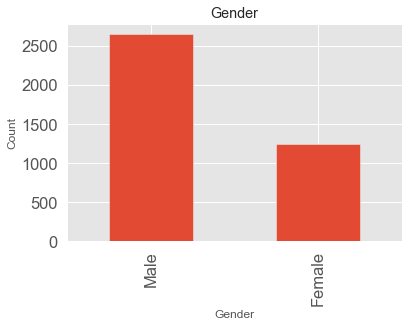

In [11]:
#understanding gender distribution
ax = df['Gender'].value_counts() \
    .plot(kind='bar', title='Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

plt.show()

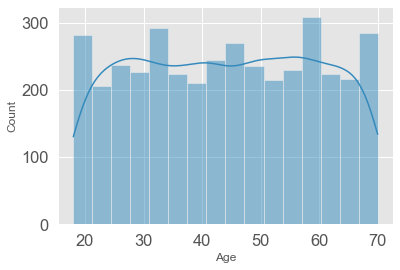

In [12]:
#age distribution
sns.histplot(data=df, x="Age", kde=True)

plt.show()


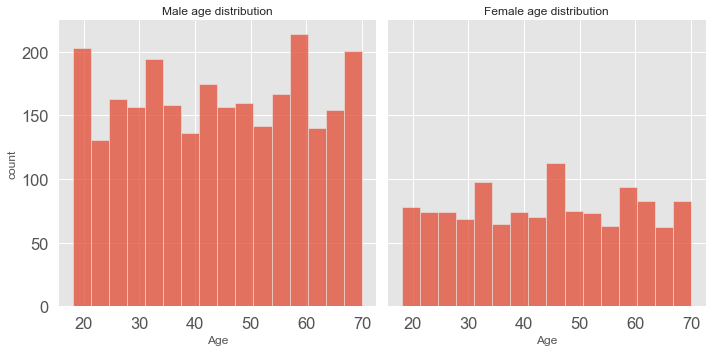

In [13]:
#male and female age distributions
g =sns.displot(data=df, x="Age", col="Gender")
g.set_axis_labels("Age", "count")
g.set_titles("{col_name} age distribution")

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

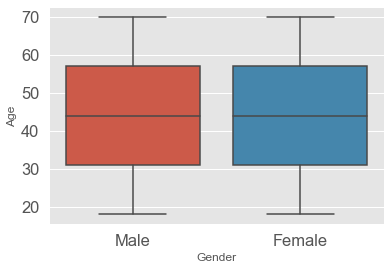

In [14]:
sns.boxplot(data=df, y="Age", x="Gender")

In [15]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


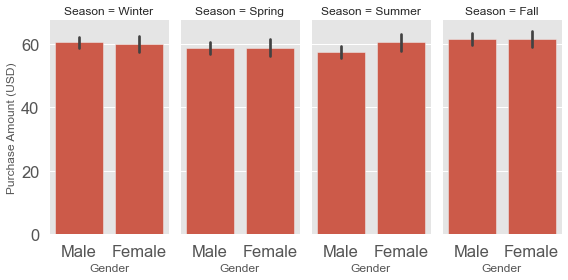

In [16]:
#comparing the purchase amount of male and female during different seasons
g = sns.FacetGrid(df, col='Season', height=4, aspect=.5)
g.map(sns.barplot, "Gender", "Purchase Amount (USD)", order=["Male", "Female"])
plt.show()

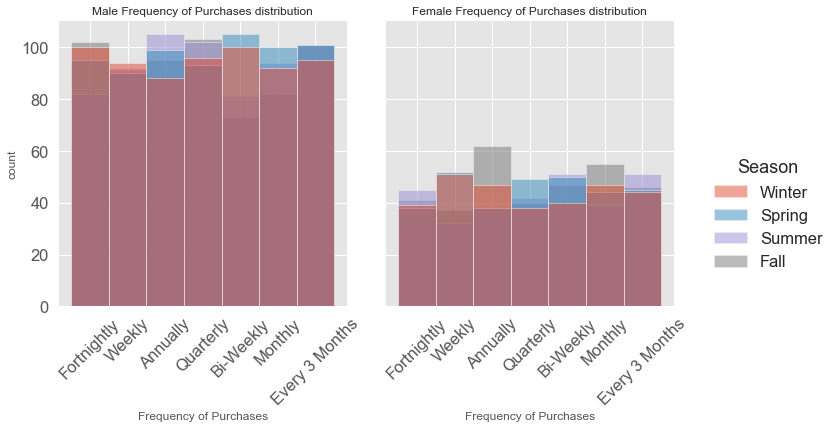

In [17]:
#frequency of purchase of males and females during different seasons

g =sns.displot(data=df, x="Frequency of Purchases", hue="Season", col="Gender", )
g.set_axis_labels("Frequency of Purchases", "count")
g.set_titles("{col_name} Frequency of Purchases distribution")
g.set_xticklabels( rotation=45)

plt.show()

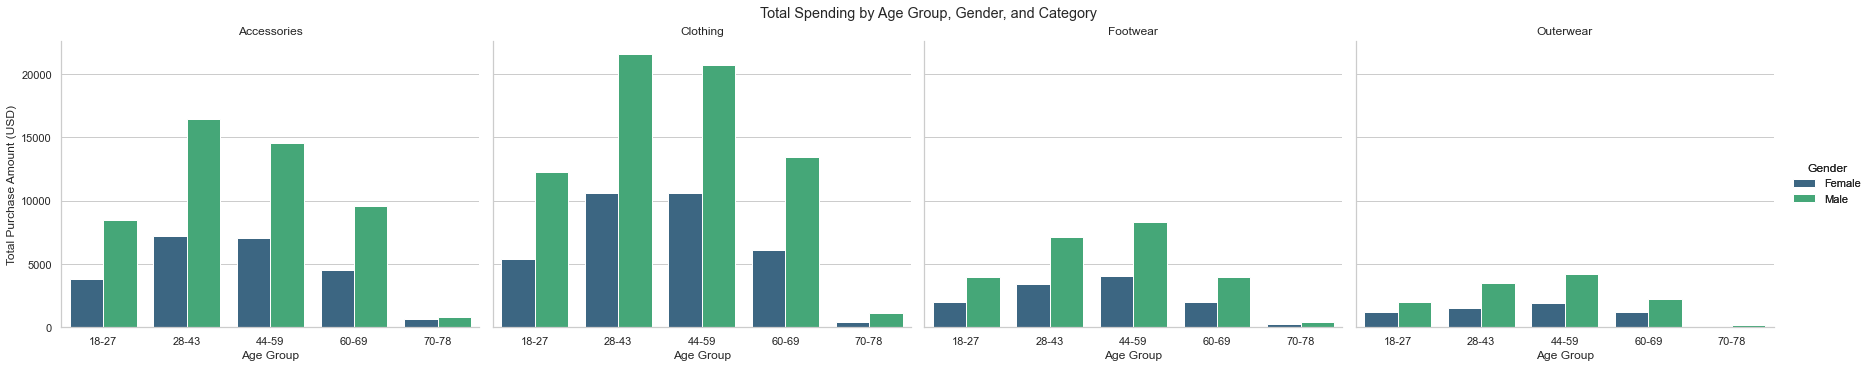

In [18]:
# Filter data to include only fashion-related items
fashion_categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
fashion_data = df[df['Category'].isin(fashion_categories)]

# Define age bins and labels
age_bins = [18, 27, 43, 59, 69, 78]
age_labels = ['18-27', '28-43', '44-59', '60-69', '70-78']

# Create age groups
fashion_data['Age Group'] = pd.cut(fashion_data['Age'], bins=age_bins, labels=age_labels)

# Group by Age Group and Gender and calculate total spending
grouped_data = fashion_data.groupby(['Age Group', 'Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()


# Set the figure size and style
sns.set(style="whitegrid")

# Create a facet grid plot
g = sns.catplot(
    data=grouped_data,
    x='Age Group',
    y='Purchase Amount (USD)',
    hue='Gender',
    col='Category',
    kind='bar',
    ci=None,
    palette='viridis',
    height=5,
    aspect=1.2
)

# Set the title and adjust layout
g.fig.suptitle('Total Spending by Age Group, Gender, and Category', y=1.02)
g.set_axis_labels('Age Group', 'Total Purchase Amount (USD)')
g.set_titles('{col_name}')
g.add_legend(title='Gender')

# Display the plot
plt.show()

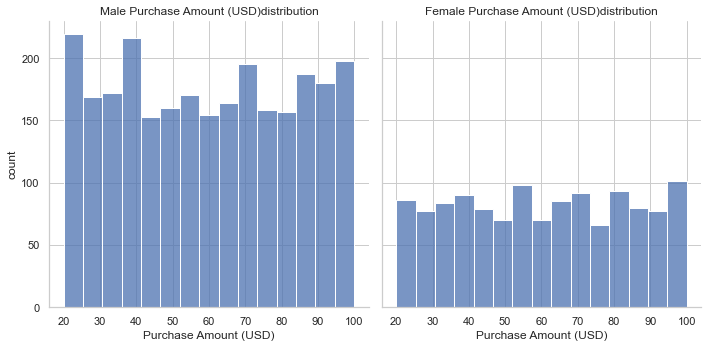

In [19]:
#purchase amount distribution of both males and females
g =sns.displot(data=df, x="Purchase Amount (USD)", col="Gender")
g.set_axis_labels("Purchase Amount (USD)", "count")
g.set_titles("{col_name} Purchase Amount (USD)distribution")

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase Amount (USD)'>

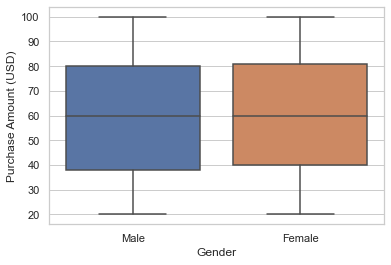

In [20]:
sns.boxplot(data=df, y="Purchase Amount (USD)", x="Gender")

In [21]:
df


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [22]:
a = df['Review Rating'].value_counts()
a

3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64

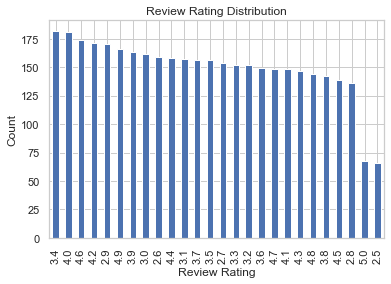

In [23]:
#understanding review rating disribution
ax = df['Review Rating'].value_counts() \
    .plot(kind='bar', title='Review Rating Distribution')
ax.set_xlabel('Review Rating')
ax.set_ylabel('Count')

plt.show()

In [24]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


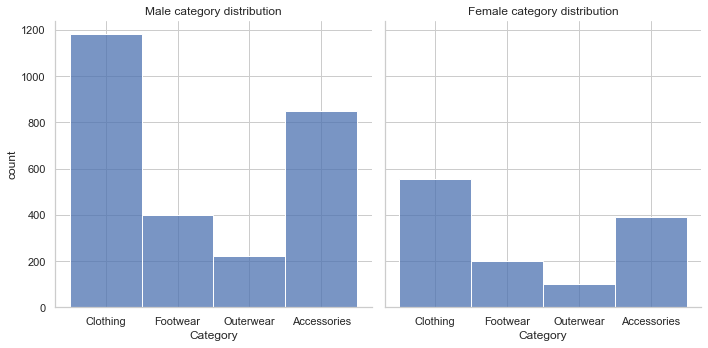

In [25]:
#understanding the distribution of males and females and product categories
g =sns.displot(data=df, x="Category", col="Gender")
g.set_axis_labels("Category", "count")
g.set_titles("{col_name} category distribution")

plt.show()

In [26]:
b = df['Location'].value_counts()
b

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

In [27]:
location_groups = df.groupby("Location")

# Analyze regional trends
for location, location_data in location_groups:
    #print(f"Regional Trends for {location}:")

    # Calculate average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    #print(f"Average Purchase Amount: ${avg_purchase_amount:.2f}")

    # Count the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    #print(f"Most Popular Category: {popular_categories}")

    # Analyze online shopping preferences
    online_shopping = location_data["Shipping Type"].apply(lambda x: "Online" if "Express" in x or "Standard" in x else "Offline")
    online_percentage = (online_shopping.value_counts() / len(online_shopping)) * 100
    #print(f"Online Shopping Preference:")
    #print(online_percentage)

    # Consider other factors based on your data and business context

   
    top_locations = df['Location'].value_counts().head(5).index

# Define different colors for bars
colors = ['#98FB98', '#FFE5CC', '#FFCCFF', '#CCE5FF', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



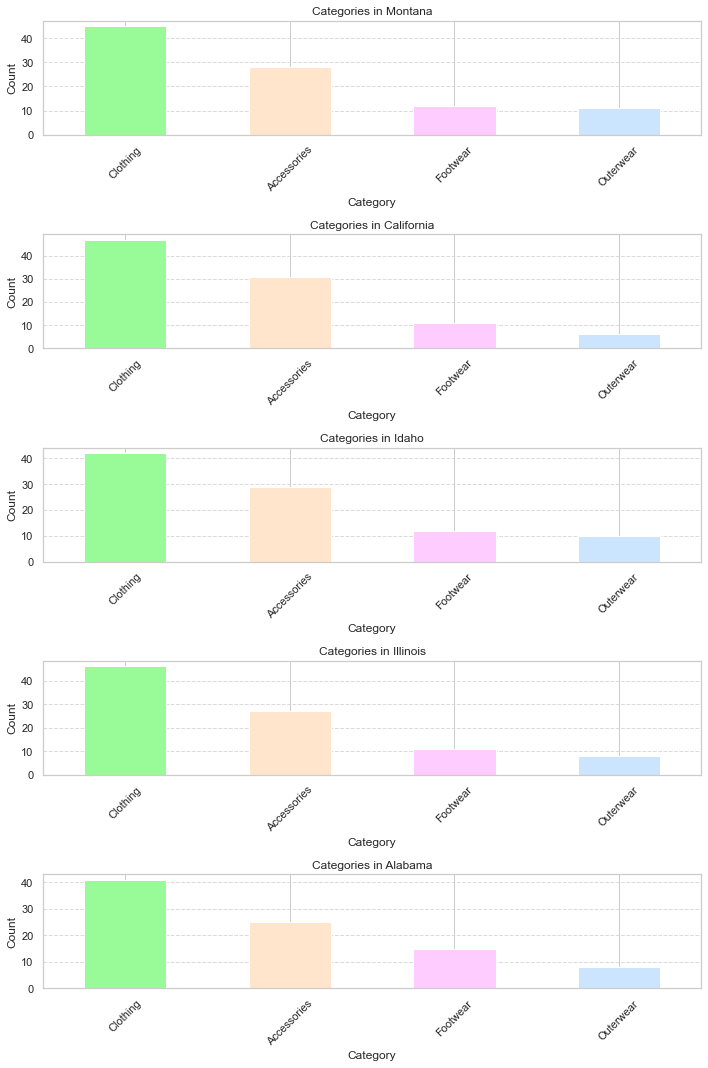

In [28]:
# Create a subplot grid for each location
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Iterate through the top locations and create category distribution plots with different colors
for i, location in enumerate(top_locations):
    location_data = df[df['Location'] == location]

    # Count the most common product categories in this location
    category_counts = location_data['Category'].value_counts().head(10)

    # Create a bar plot for the category distribution with different colors
    ax = axes[i]
    category_counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Categories in {location}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.set_xticklabels(category_counts.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust subplot layout for a clean appearance
plt.tight_layout()

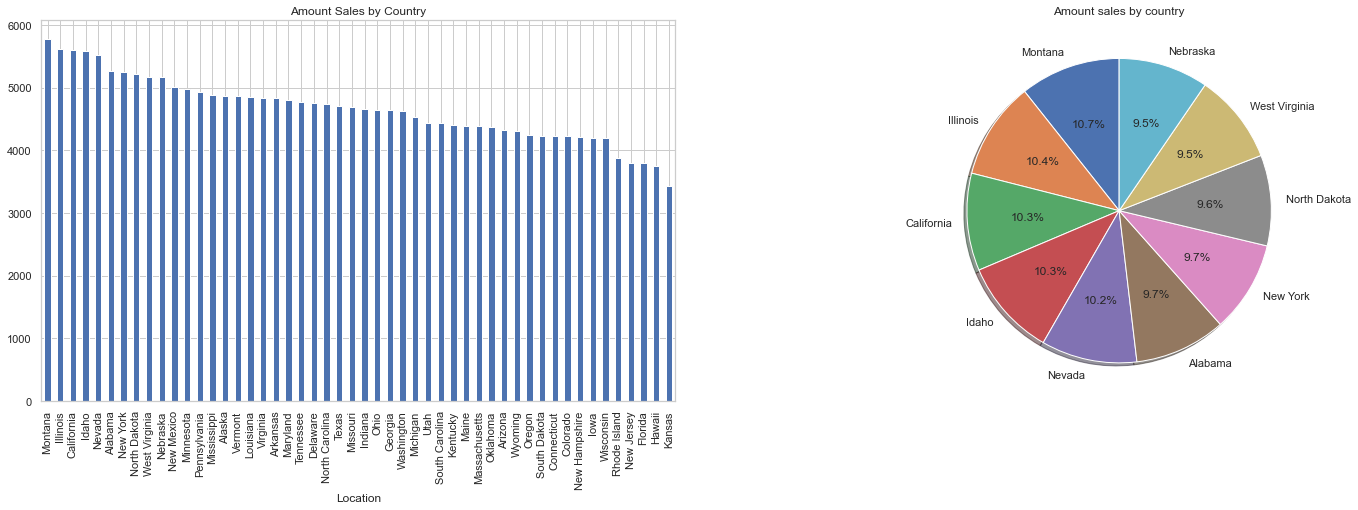

In [29]:
#distribution of locations according to the purchase amount
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
g2 = df.groupby(["Location"])['Purchase Amount (USD)'].sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by Country')
g3 = df.groupby(["Location"])['Purchase Amount (USD)'].sum().sort_values(ascending = False)[:10]
f2 = fig.add_subplot(122)
g1 = plt.pie(g3, labels=g3.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Amount sales by country')
plt.show()


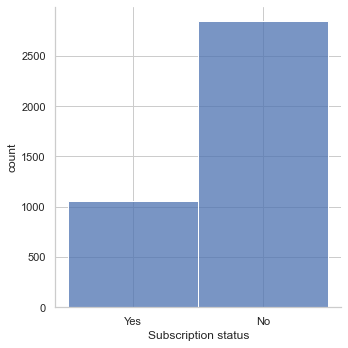

In [30]:
#distribution of subscription status
g =sns.displot(data=df, x="Subscription Status")
g.set_axis_labels("Subscription status", "count")
g.set_titles("subscription distribution")

plt.show()
  

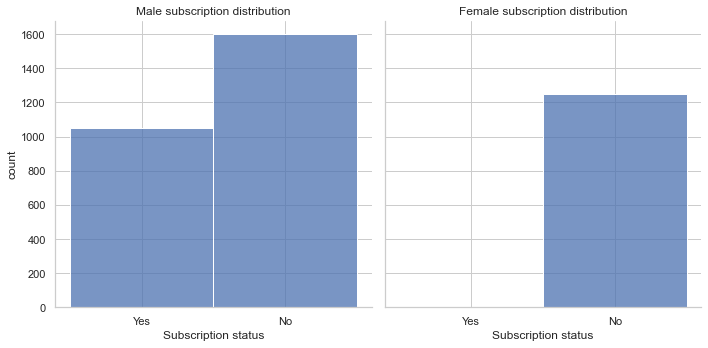

In [31]:
#distribution subscription status amongs males and females
g =sns.displot(data=df, x="Subscription Status", col="Gender")
g.set_axis_labels("Subscription status", "count")
g.set_titles("{col_name} subscription distribution")

plt.show()
  


In [32]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


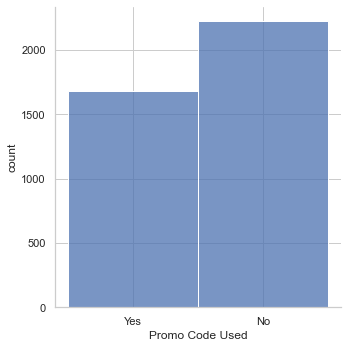

In [33]:
#distribution of promo code used
g =sns.displot(data=df, x="Promo Code Used")
g.set_axis_labels("Promo Code Used", "count")
g.set_titles("Promo Code Used")

plt.show()


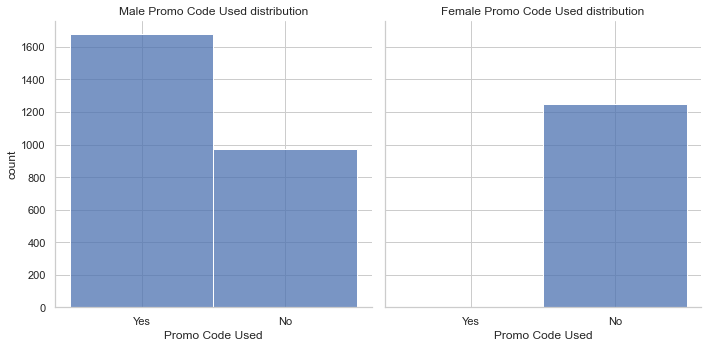

In [34]:
#distribution of promo code used amongs males and females
g =sns.displot(data=df, x="Promo Code Used", col="Gender")
g.set_axis_labels("Promo Code Used", "count")
g.set_titles("{col_name} Promo Code Used distribution")

plt.show()

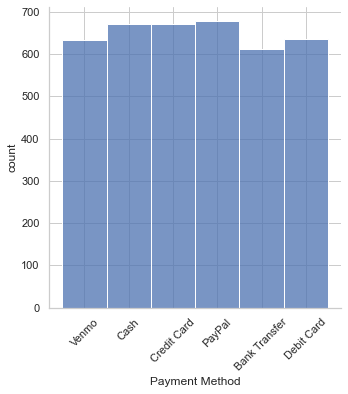

In [35]:
#distribution of different payment method
g =sns.displot(data=df, x="Payment Method")
g.set_axis_labels("Payment Method", "count")
g.set_titles("Payment Method")
g.set_xticklabels( rotation=45)

plt.show()



In [36]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


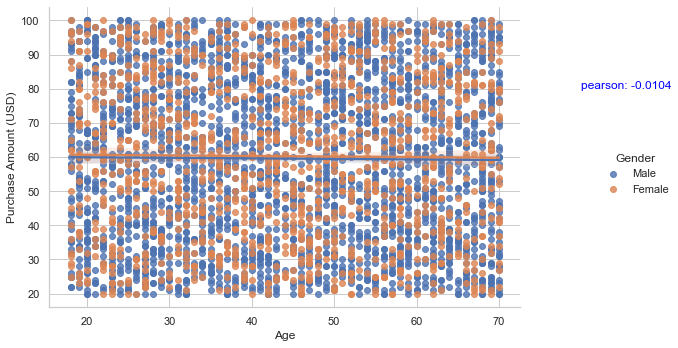

In [37]:
#understanding the correlation between age and purchase amount
from scipy.stats import pearsonr
sns.lmplot('Age', 'Purchase Amount (USD)', data=df, hue='Gender', aspect=1.5)
#calculating pearsonr,s correlation
corr, _ = pearsonr(df['Age'], df['Purchase Amount (USD)'])
corr
plt.text(80,80, 'pearson: {:.4f}'.format(corr), color='blue')
plt.show()

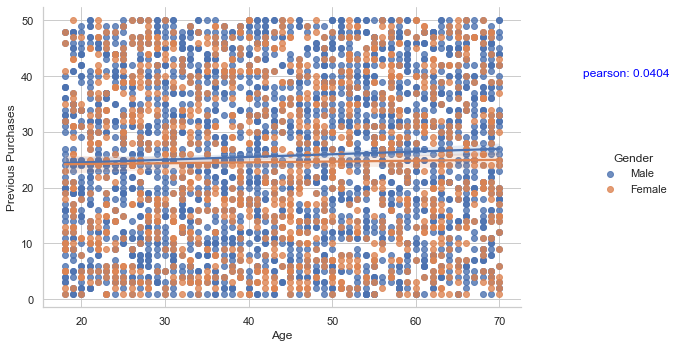

In [38]:
#understanding the correlation between age and prvious purchases
sns.lmplot('Age', 'Previous Purchases', data=df, hue='Gender', aspect=1.5)
corr2, _ = pearsonr(df['Age'], df['Previous Purchases'])
corr2
plt.text(80,40, 'pearson: {:.4f}'.format(corr2), color='blue')
plt.show()
plt.show()


# CLUSTER ANALYSIS

In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

# Assume consumer_data is your DataFrame
# Filter relevant columns
data = df[['Purchase Amount (USD)', 'Previous Purchases', 'Age']]

# Handle missing values (if any)
data.dropna(inplace=True)


# Standardize numerical features
scaler = StandardScaler()
data[['Purchase Amount (USD)', 'Age', 'Previous Purchases']] = scaler.fit_transform(data[['Purchase Amount (USD)', 'Age', 'Previous Purchases']])

# Apply K-means clustering
# Determine the optimal number of clusters using the Elbow Method
K = range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters




,Clusters,WSS
0,1,11700.000000
1,2,8744.870935
2,3,6949.047264
3,4,5505.419238
4,5,4578.153205
5,6,3825.900834
6,7,3343.564201
7,8,2900.750486
8,9,2727.879742
9,10,2577.895807


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

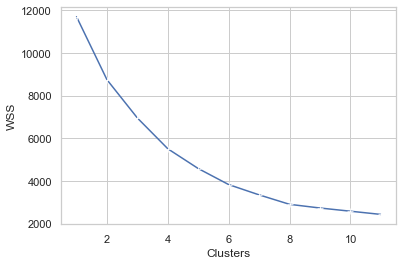

In [40]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 6 Clusters

In [41]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(data).labels_
    score = metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.24965907290851422
Silhouette score for k(clusters) = 4 is 0.27182301153495364
Silhouette score for k(clusters) = 5 is 0.27673202870443775
Silhouette score for k(clusters) = 6 is 0.2914938633827378
Silhouette score for k(clusters) = 7 is 0.27681990068194307
Silhouette score for k(clusters) = 8 is 0.279741964780319
Silhouette score for k(clusters) = 9 is 0.275825729655564
Silhouette score for k(clusters) = 10 is 0.265558151756866
Silhouette score for k(clusters) = 11 is 0.25812763956461904
Silhouette score for k(clusters) = 12 is 0.27017776944222943


In [42]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.249659
1,4,0.271823
2,5,0.276732
3,6,0.291494
4,7,0.276820
5,8,0.279742
6,9,0.275826
7,10,0.265558
8,11,0.258128
9,12,0.270178


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

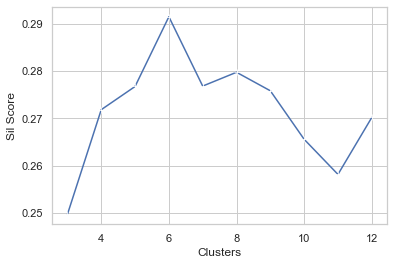

In [43]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

         Purchase Amount (USD)  Previous Purchases       Age
Cluster                                                     
0                    -0.109505            0.999619 -0.938176
1                    -0.964167           -0.809950 -0.647968
2                     0.271372           -1.001999  0.938305
3                     0.982162            0.820052  0.732003
4                    -0.956622            0.584594  0.860352
5                     0.937558           -0.682767 -0.876838


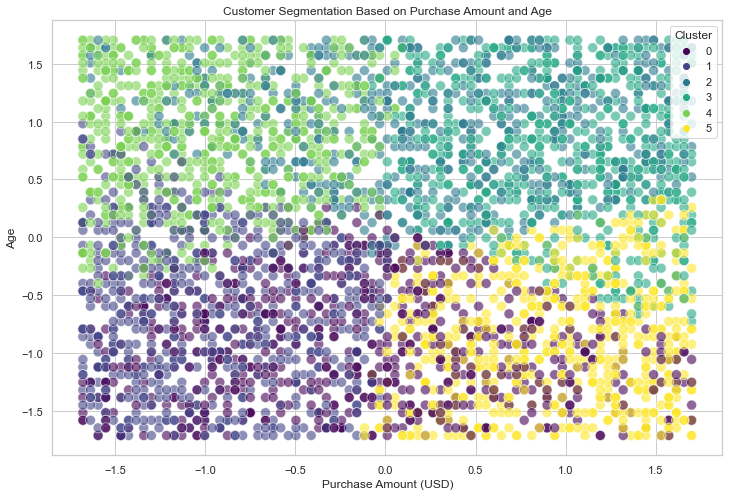

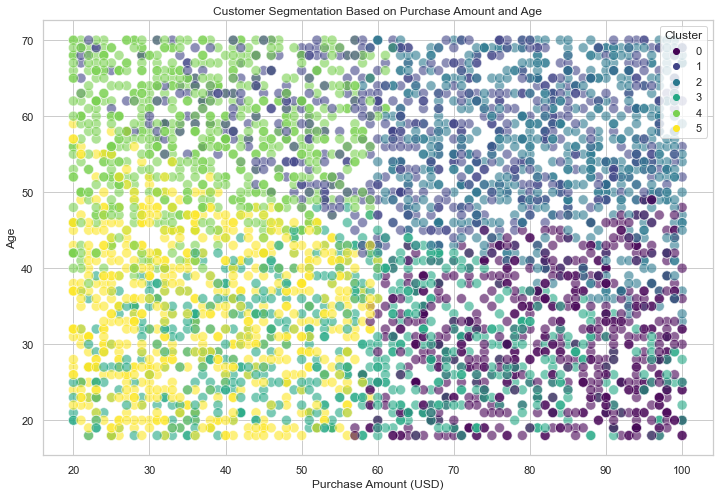

In [44]:
# From the Elbow plot, choose an optimal number of clusters (e.g., 4)
optimal_clusters = 6

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters,init="k-means++", random_state=0)
data['Cluster'] = kmeans.fit_predict(data)
df['Cluster'] = kmeans.fit_predict(data)

# Analyze the clusters
print(data.groupby('Cluster').mean())
cluster_group = df.groupby('Cluster').size().to_frame()
cluster_group.columns = ['size']
cluster_group
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Purchase Amount (USD)', y='Age', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segmentation Based on Purchase Amount and Age')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Age')
plt.legend(title='Cluster')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Purchase Amount (USD)', y='Age', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segmentation Based on Purchase Amount and Age')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

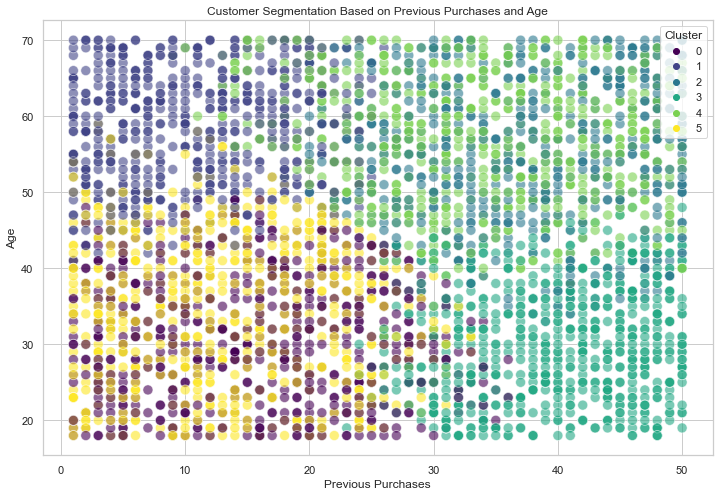

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Previous Purchases', y='Age', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segmentation Based on Previous Purchases and Age')
plt.xlabel('Previous Purchases')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

BUILDING CUSTOM ALGORITHM

In [46]:
data

,Purchase Amount (USD),Previous Purchases,Age,Cluster
0,-0.285629,-0.785831,0.718913,2
1,0.178852,-1.616552,-1.648629,5
2,0.558882,-0.162789,0.390088,2
3,1.276716,1.637107,-1.517099,0
4,-0.454531,0.391025,0.061263,4
...,...,...,...,...
3895,-1.341267,0.460252,-0.267563,4
3896,-0.454531,1.083293,0.521618,4
3897,-1.130139,-0.093563,0.127028,4
3898,0.727784,-0.093563,-0.004502,5


In [47]:
data2 = df[['Purchase Amount (USD)', 'Previous Purchases', 'Age']]
data2.describe() 

,Purchase Amount (USD),Previous Purchases,Age
count,3900.000000,3900.000000,3900.000000
mean,59.764359,25.351538,44.068462
std,23.685392,14.447125,15.207589
min,20.000000,1.000000,18.000000
25%,39.000000,13.000000,31.000000
50%,60.000000,25.000000,44.000000
75%,81.000000,38.000000,57.000000
max,100.000000,50.000000,70.000000


1. Scale the data
2. Initialize rnadom centroids
3. Label each data point
4. Update centroids
5. Repeat steps 3 and 4 until centroids stop changing

In [48]:
#scale the data using minmax
data3 = ((data2 - data2.min()) / (data2.max() - data2.min())) * 10 + 1

In [49]:
data3.describe()

,Purchase Amount (USD),Previous Purchases,Age
count,3900.000000,3900.000000,3900.000000
mean,5.970545,5.969702,6.013166
std,2.960674,2.948393,2.924536
min,1.000000,1.000000,1.000000
25%,3.375000,3.448980,3.500000
50%,6.000000,5.897959,6.000000
75%,8.625000,8.551020,8.500000
max,11.000000,11.000000,11.000000


In [50]:
#initialize random centroids
#creating k number of centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        #randoming creating a single centroid/value from each row
        centroid = data2.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [51]:
#using the number of centoids generated from the elbow method and silhouete score
centroids = random_centroids(data, 6)

In [52]:
centroids

,0,1,2,3,4,5
Purchase Amount (USD),51.0,27.0,60.0,100.0,45.0,72.0
Previous Purchases,22.0,31.0,10.0,49.0,47.0,4.0
Age,68.0,45.0,27.0,55.0,38.0,34.0


In [53]:
#finding the distance between each centroids from the actual values from each datapoint
def get_labels(data, centroids):
    #finding the distance between the centroids and each datapoint
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    #finding the index of the minimun value in each row. finding the cluster assignment for each datapoint
    return distances.idxmin(axis=1)

In [54]:
labels = get_labels(data2, centroids)

In [55]:
labels.value_counts()

1    774
5    704
0    686
3    610
4    569
2    557
dtype: int64

In [56]:
#finding the geometric mean of points in euclidean space
def new_centroids(data, labels, k):
    #applying a funtion calculating the geometric mean to labels
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [58]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

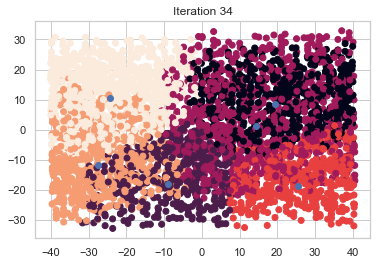

In [59]:
max_iterations = 100
centroid_count = 6

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data2, centroids)
    centroids = new_centroids(data2, labels, centroid_count)
    plot_clusters(data2, labels, centroids, iteration)
    iteration += 1

In [60]:
centroids

,0,1,2,3,4,5
Purchase Amount (USD),79.516590,50.729004,74.093624,85.294599,32.017191,35.618332
Previous Purchases,12.244371,8.175504,39.357804,11.674641,27.405559,18.665501
Age,57.611393,31.092610,40.543368,28.621503,31.001509,57.677875


# DBSCAN

In [61]:
x1 = df[['Purchase Amount (USD)', 'Previous Purchases', 'Age']]

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
If the dataset has two dimensions, use the min sample per cluster as 4.
If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension
Since our data is three-dimensional, we shall use the default value of 6 as our MinPoint parameter

# Compute data proximity from each other using Nearest Neighbours 

In [62]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=6) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x1) # fitting the data to the object
distances,indices=nbrs.kneighbors(x1) # finding the nearest neighbours

# Sorting and plot the distances between the data points 

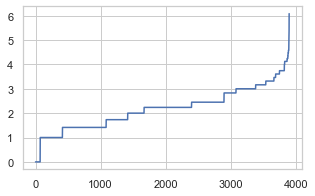

In [63]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot




From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 8.

We now have our two parameters as:
MinPoints = 6
Eps = 4
Now that we have the parameters let us implement the DBSCAN model.

# Implementing the DBSCAN model 

In [64]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 4, min_samples = 6).fit(x1) # fitting the model
labels = dbscan.labels_ # getting the labels

In [65]:
x1['clusters'] = labels

In [66]:
x1.shape

(3900, 4)

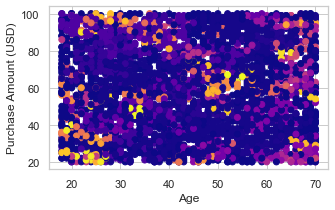

In [67]:
# Plot the clusters
plt.scatter(x= 'Age', y='Purchase Amount (USD)', data=x1, c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Age") # X-axis label
plt.ylabel("Purchase Amount (USD)") # Y-axis label
plt.show() # showing the plot

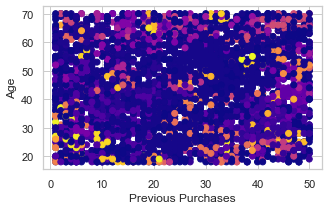

In [68]:
# Plot the clusters
plt.scatter(x= 'Previous Purchases', y='Age', data=x1, c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Previous Purchases") # X-axis label
plt.ylabel("Age") # Y-axis label
plt.show() # showing the plot

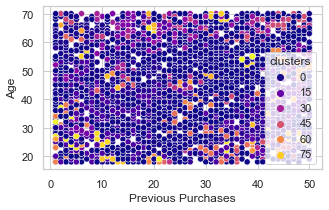

In [69]:
# Plot the clusters
sns.scatterplot(x= 'Previous Purchases', y='Age', data=x1, hue = 'clusters', palette= "plasma") # plotting the clusters
plt.xlabel("Previous Purchases") # X-axis label
plt.ylabel("Age") # Y-axis label
plt.show() # showing the plot

In [70]:
x1['clusters']

0       31
1        0
2        0
3       -1
4        0
        ..
3895     0
3896     0
3897     0
3898    35
3899     0
Name: clusters, Length: 3900, dtype: int64

In [71]:
k = x1.groupby('clusters').size()
k

clusters
-1      779
 0     1458
 1       75
 2       47
 3       81
       ... 
 80       6
 81       8
 82       6
 83       6
 84       5
Length: 86, dtype: int64

In [72]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,3
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,4
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,4
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,4
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,0


# colaborative filtering

Using age and gender to create customers

In [73]:
df['customer_identifier'] = df['Age'].astype(str) + df['Gender']

In [81]:
df[df['customer_identifier'] == '55Male']

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster,customer_identifier,customer_identifier_num,Item Purchased_num
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,Express,Yes,Yes,14,Venmo,Fortnightly,1,55Male,75,2
47,55,Male,Jewelry,Accessories,54,Montana,M,Charcoal,Winter,4.5,...,Free Shipping,Yes,Yes,36,Cash,Weekly,4,55Male,75,12
61,55,Male,Scarf,Accessories,68,Texas,M,Orange,Winter,4.7,...,Store Pickup,Yes,Yes,21,Credit Card,Every 3 Months,1,55Male,75,15
104,55,Male,Sunglasses,Accessories,24,New Hampshire,L,Pink,Spring,4.4,...,2-Day Shipping,Yes,Yes,1,PayPal,Monthly,5,55Male,75,22
116,55,Male,Shoes,Footwear,86,Virginia,S,Blue,Spring,3.4,...,Free Shipping,Yes,Yes,12,Venmo,Annually,1,55Male,75,17
209,55,Male,Sandals,Footwear,97,Minnesota,S,Olive,Winter,3.2,...,Store Pickup,Yes,Yes,44,Cash,Every 3 Months,2,55Male,75,14
242,55,Male,Coat,Outerwear,85,New York,L,Gray,Summer,4.3,...,Store Pickup,Yes,Yes,40,Debit Card,Every 3 Months,2,55Male,75,4
363,55,Male,Shorts,Clothing,88,Florida,L,Yellow,Winter,3.1,...,Free Shipping,Yes,Yes,42,Bank Transfer,Fortnightly,2,55Male,75,18
365,55,Male,Gloves,Accessories,88,West Virginia,XL,Gray,Summer,3.7,...,Standard,Yes,Yes,50,PayPal,Quarterly,2,55Male,75,6
471,55,Male,Scarf,Accessories,72,Missouri,XL,White,Winter,4.9,...,2-Day Shipping,Yes,Yes,36,Bank Transfer,Quarterly,2,55Male,75,15


In [76]:
#converting the customer_identifier to numeric data type
from sklearn.preprocessing import LabelEncoder
customer_ide = LabelEncoder()
df['customer_identifier_num'] = customer_ide.fit_transform(df['customer_identifier'])

In [77]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster,customer_identifier,customer_identifier_num
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1,55Male,75
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,19Male,3
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1,50Male,65
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,3,21Male,7
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,4,45Male,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,4,40Female,44
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,4,52Female,68
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,4,46Female,56
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,0,44Female,52


In [79]:
#converting the item purchased column to numeric data type
df['Item Purchased_num'] = customer_ide.fit_transform(df['Item Purchased'])

In [80]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster,customer_identifier,customer_identifier_num,Item Purchased_num
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,Express,Yes,Yes,14,Venmo,Fortnightly,1,55Male,75,2
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,Express,Yes,Yes,2,Cash,Fortnightly,0,19Male,3,23
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1,50Male,65,11
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,3,21Male,7,14
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,...,Free Shipping,Yes,Yes,31,PayPal,Annually,4,45Male,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,...,2-Day Shipping,No,No,32,Venmo,Weekly,4,40Female,44,9
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,4,52Female,68,0
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,...,Standard,No,No,24,Venmo,Quarterly,4,46Female,56,1
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,...,Express,No,No,24,Venmo,Weekly,0,44Female,52,17


In [87]:
#extracting the new customer id, purchased items id and review ratings in a new dataframe
df4 = df[['customer_identifier_num', 'Item Purchased_num', 'Review Rating']]

In [88]:
df4

,customer_identifier_num,Item Purchased_num,Review Rating
0,75,2,3.1
1,3,23,3.1
2,65,11,3.1
3,7,14,3.5
4,55,2,2.7
...,...,...,...
3895,44,9,4.2
3896,68,0,4.5
3897,56,1,2.9
3898,52,17,3.8


#  Data Pre-processing

We are going to use a technique called colaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things.

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent item purchased. The beauty of collaborative filtering is that it doesn't require any information about the users to generate recommendations.



The create_X() function outputs a sparse matrix 
 with four mapper dictionaries:

user_mapper: maps user id to user index
item_mapper: maps item id to item index
user_inv_mapper: maps user index to user id
item_inv_mapper: maps item index to item id
We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/item.


In [108]:
from scipy.sparse import csr_matrix

def create_X(df4):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, itemId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        item_mapper: dict that maps item id's to item indices
        item_inv_mapper: dict that maps item indices to item id's
    """
    M = df['customer_identifier_num'].nunique()
    N = df['Item Purchased_num'].nunique()

    user_mapper = dict(zip(np.unique(df["customer_identifier_num"]), list(range(M))))
    item_mapper = dict(zip(np.unique(df["Item Purchased_num"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["customer_identifier_num"])))
    item_inv_mapper = dict(zip(list(range(N)), np.unique(df["Item Purchased_num"])))
    
    user_index = [user_mapper[i] for i in df['customer_identifier_num']]
    item_index = [item_mapper[i] for i in df['Item Purchased_num']]

    X = csr_matrix((df["Review Rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_X(df4)


In [109]:
X.shape

(106, 25)

# Evaluating sparsity

Our X matrix contains 106 users and 25 purchased items.


Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix (nnz) is equivalent to the number of ratings in our dataset.

In [110]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 74.04%


In [111]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

106

In [112]:
print(f"Most active user rated {n_ratings_per_user.max()} purchased items.")
print(f"Least active user rated {n_ratings_per_user.min()} purchased items.")

Most active user rated 25 purchased items.
Least active user rated 8 purchased items.


In [113]:
n_ratings_per_item = X.getnnz(axis=0)
len(n_ratings_per_item)

25

In [114]:
print(f"Most rated item has {n_ratings_per_item.max()} ratings.")
print(f"Least rated item has {n_ratings_per_item.min()} ratings.")

Most rated item has 90 ratings.
Least rated item has 69 ratings.


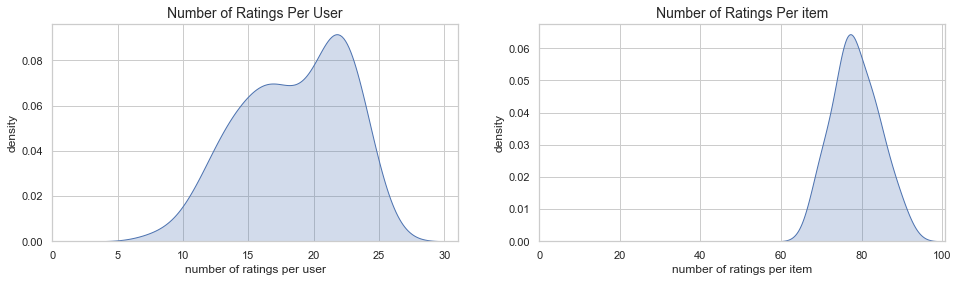

In [115]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_item, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per item", fontsize=14)
plt.xlabel("number of ratings per item")
plt.ylabel("density")
plt.show()

# Item-item Recommendations with k-Nearest Neighbors

In [116]:
from sklearn.neighbors import NearestNeighbors

def find_similar_items(item_id, X, item_mapper, item_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given item id.
    
    Args:
        item_id: id of the purchased items of interest
        X: user-item utility matrix
        k: number of similar purchased items to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar items ID's
    """
    X = X.T
    neighbour_ids = []
    
    item_ind = item_mapper[item_id]
    item_vec = X[item_ind]
    if isinstance(item_vec, (np.ndarray)):
        movie_vec = item_vec.reshape(1,-1)
    # use k+1 since kNN output includes the itemId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(item_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(item_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [117]:
similar_item = find_similar_items(1, X, item_mapper, item_inv_mapper, k=10)
similar_item

[17, 5, 15, 2, 23, 13, 8, 16, 4]

In [100]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster,customer_identifier,customer_identifier_num,Item Purchased_num
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,Express,Yes,Yes,14,Venmo,Fortnightly,1,55Male,75,2
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,Express,Yes,Yes,2,Cash,Fortnightly,0,19Male,3,23
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1,50Male,65,11
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,3,21Male,7,14
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,...,Free Shipping,Yes,Yes,31,PayPal,Annually,4,45Male,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,...,2-Day Shipping,No,No,32,Venmo,Weekly,4,40Female,44,9
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,4,52Female,68,0
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,...,Standard,No,No,24,Venmo,Quarterly,4,46Female,56,1
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,...,Express,No,No,24,Venmo,Weekly,0,44Female,52,17


In [118]:
item_titles = dict(zip(df['Item Purchased_num'], df['Item Purchased']))

item_id = 12

similar_item = find_similar_items(item_id, X, item_mapper, item_inv_mapper, metric='cosine', k=5)
item_title = item_titles[item_id]

print(f"Because you bought {item_title}:")
for i in similar_item:
    print(item_titles[i])

Because you bought Jewelry:
Dress
Sandals
Backpack
Hoodie
